In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [299]:
df=df.drop('Id',axis=1)

In [300]:
print(df.columns[(df.isnull().mean()>0.2)])
df=df.drop(df.columns[(df.isnull().mean()>0.2)],axis=1)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [301]:
df['SalePrice']=np.log(df['SalePrice'])

In [302]:
df_int=df[[ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']]

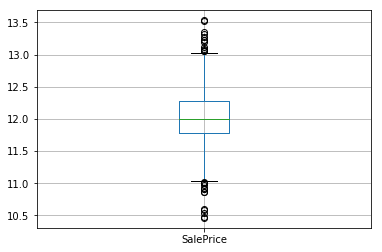

In [303]:
df_int.boxplot('SalePrice')

In [304]:
u=[]
l=[]
for i in df_int.columns:
    X=df[i]
    upperlimit=X.quantile(0.75)+1.5*(X.quantile(0.75)-X.quantile(0.25))
    u.append(upperlimit)
    lowerlimit=X.quantile(0.25)-1.5*(X.quantile(0.75)-X.quantile(0.25))
    l.append(upperlimit)
    for j in range(0,len(X)):
        if df.ix[j,i] > upperlimit:
            df.ix[j,i]=upperlimit
        elif df.ix[j,i] < lowerlimit:
            df.ix[j,i]=lowerlimit

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by Interactive

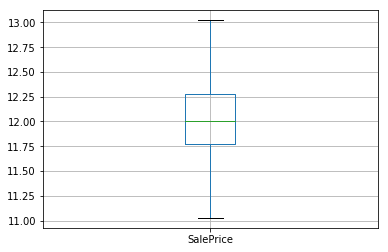

In [305]:
df.boxplot('SalePrice')

In [306]:
mapper = {np.NaN :0, 'Po':1,  'Fa':2,'TA':3,'Gd':4,'Ex':5}
df['BsmtQual']=df['BsmtQual'].replace(mapper).astype(int)
df['BsmtCond']=df['BsmtCond'].replace(mapper).astype(int)
df['HeatingQC']=df['HeatingQC'].replace(mapper).astype(int)
df['KitchenQual']=df['KitchenQual'].replace(mapper).astype(int)
df['GarageQual']=df['GarageQual'].replace(mapper).astype(int)
df['GarageCond']=df['GarageCond'].replace(mapper).astype(int)
df['ExterQual']=df['ExterQual'].replace(mapper).astype(int)
df['ExterCond']=df['ExterCond'].replace(mapper).astype(int)



mapper = {np.NaN :0, 'No':1,  'Mn':2,'Av':3,'Gd':4}
df['BsmtExposure']=df['BsmtExposure'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Unf':1,  'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
df['BsmtFinType1']=df['BsmtFinType1'].replace(mapper).astype(int)
df['BsmtFinType2']=df['BsmtFinType2'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Detchd':1,  'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6}
df['GarageType']=df['GarageType'].replace(mapper).astype(int)


mapper = {np.NaN :0, 'Unf':1,  'RFn':2,'Fin':3}
df['GarageFinish']=df['GarageFinish'].replace(mapper).astype(int)



df['Electrical'][df.Electrical.isnull()]=df.Electrical.mode().values[0]
mapper = {'FuseP' :0, 'Mix':0,  'FuseF':1,'FuseA':2,'SBrkr':1}
df['Electrical']=df['Electrical'].replace(mapper).astype(int)

mapper = {'N' :0, 'Y':1}
df['CentralAir']=df['CentralAir'].replace(mapper).astype(int)

mapper={'IR3':0,'IR2':1,'IR2':2,'IR1':3,'Reg':4}
df['LotShape']=df['LotShape'].replace(mapper).astype(int)

#mapper={'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}
#df['Utilities']=df['Utilities'].replace(mapper).astype(int)

mapper={'Gtl':0,'Mod':1,'Sev':2}
df['LandSlope']=df['LandSlope'].replace(mapper).astype(int)

mapper={'N':0,'P':1,'Y':2}
df['PavedDrive']=df['PavedDrive'].replace(mapper).astype(int)

mapper={'Grvl':0,'Pave':1}
df['Street']=df['Street'].replace(mapper).astype(int)



C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [307]:
df['MasVnrType'].value_counts()
df['MasVnrType'][df['MasVnrType'].isnull()]=None
df['MasVnrType']=df['MasVnrType'].astype(str)

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [308]:
X=df.copy()
y=df['SalePrice']
X=X.drop('SalePrice',axis=1)

In [309]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [310]:
cat_imp=DataFrameImputer()
cat_imp.fit(X)
df=cat_imp.transform(X)
X.shape

(1460, 74)

In [311]:
cat=df.columns[df.dtypes=='object']
df_cat=df[cat]
num=df.columns[df.dtypes!='object']
df_num=df[num]

In [312]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df_cat)
df_cat=pd.DataFrame(enc.transform(df_cat).toarray())
df_cat.columns=enc.get_feature_names()
df_cat.shape

(1460, 154)

In [313]:
X=pd.DataFrame(df_cat.columns)
Y=X[0].str.split("_",n = 1, expand = True)
Y.columns=['grp','extra']
Y['val']=np.arange(0,len(Y['grp']),1)
Y['rank']=Y.groupby("grp")["val"].rank(ascending=False,method='dense').astype(int)
Y['Column']=Y['grp']+"_"+Y['extra']
dummy_trap=Y[Y['rank']==1]['Column']
#len(Y['grp'])

df_cat=df_cat.drop(dummy_trap,axis=1)

In [314]:
df_cat.shape

(1460, 135)

In [315]:
#df_num2=df[df.columns[df.dtypes!='object']]
X=df_num.join(df_cat)
X.shape


(1460, 190)

Splitting Data

In [316]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [317]:
X_train.shape

(1168, 190)

In [318]:
from sklearn.linear_model import Ridge

In [319]:
rr = Ridge(alpha=9)
rr.fit(X_train,y_train)

Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [320]:
print(rr.score(X_test,y_test))
print(rr.score(X_train,y_train))

0.9226937818950597
0.9314074391675112


In [321]:
print(rr.predict(X_test).max())

13.050795453800465


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9f65a2f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9f67a6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9f65a2940>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9f7a55780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9f7a55ba8>],
 'means': []}

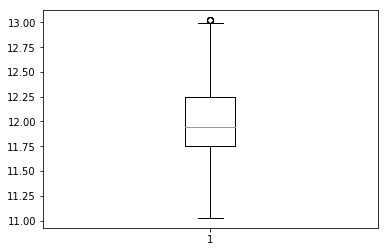

In [322]:
import matplotlib.pyplot as plt
plt.boxplot(y_test)

In [323]:
from sklearn.model_selection import GridSearchCV
params={'alpha':np.arange(0,200,1)}
grid_search=GridSearchCV(rr,params,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0,   1, ..., 198, 199])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [324]:
grid_search.best_estimator_

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Test Predictions

In [325]:
df=pd.read_csv('test.csv')
df.shape
Id=df.Id
df=df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','Id'],axis=1)

In [326]:
mapper = {np.NaN :0, 'Po':1,  'Fa':2,'TA':3,'Gd':4,'Ex':5}
df['BsmtQual']=df['BsmtQual'].replace(mapper).astype(int)
df['BsmtCond']=df['BsmtCond'].replace(mapper).astype(int)
df['HeatingQC']=df['HeatingQC'].replace(mapper).astype(int)
df['KitchenQual']=df['KitchenQual'].replace(mapper).astype(int)
df['GarageQual']=df['GarageQual'].replace(mapper).astype(int)
df['GarageCond']=df['GarageCond'].replace(mapper).astype(int)
df['ExterQual']=df['ExterQual'].replace(mapper).astype(int)
df['ExterCond']=df['ExterCond'].replace(mapper).astype(int)



mapper = {np.NaN :0, 'No':1,  'Mn':2,'Av':3,'Gd':4}
df['BsmtExposure']=df['BsmtExposure'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Unf':1,  'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
df['BsmtFinType1']=df['BsmtFinType1'].replace(mapper).astype(int)
df['BsmtFinType2']=df['BsmtFinType2'].replace(mapper).astype(int)

mapper = {np.NaN :0, 'Detchd':1,  'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6}
df['GarageType']=df['GarageType'].replace(mapper).astype(int)


mapper = {np.NaN :0, 'Unf':1,  'RFn':2,'Fin':3}
df['GarageFinish']=df['GarageFinish'].replace(mapper).astype(int)



df['Electrical'][df.Electrical.isnull()]=df.Electrical.mode().values[0]
mapper = {'FuseP' :0, 'Mix':0,  'FuseF':1,'FuseA':2,'SBrkr':1}
df['Electrical']=df['Electrical'].replace(mapper).astype(int)

mapper = {'N' :0, 'Y':1}
df['CentralAir']=df['CentralAir'].replace(mapper).astype(int)

mapper={'IR3':0,'IR2':1,'IR2':2,'IR1':3,'Reg':4}
df['LotShape']=df['LotShape'].replace(mapper).astype(int)

#mapper={'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}
#df['Utilities']=df['Utilities'].replace(mapper).astype(int)

mapper={'Gtl':0,'Mod':1,'Sev':2}
df['LandSlope']=df['LandSlope'].replace(mapper).astype(int)

mapper={'N':0,'P':1,'Y':2}
df['PavedDrive']=df['PavedDrive'].replace(mapper).astype(int)

mapper={'Grvl':0,'Pave':1}
df['Street']=df['Street'].replace(mapper).astype(int)



C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [327]:
df['MasVnrType'].value_counts()
df['MasVnrType'][df['MasVnrType'].isnull()]=None
df['MasVnrType']=df['MasVnrType'].astype(str)

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [328]:
df=cat_imp.transform(df)

In [329]:
#df_num=df._get_numeric_data()

print(df.shape)
num_columns=['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
        'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']


df_num=df[num_columns]
print(df_num.shape)

(1459, 74)
(1459, 55)


In [330]:
df[df.columns[df.dtypes=='object']].isnull().any()

MSZoning         False
LandContour      False
Utilities        False
LotConfig        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
Foundation       False
Heating          False
Functional       False
SaleType         False
SaleCondition    False
dtype: bool

In [331]:
df[cat].shape

(1459, 19)

In [332]:
df_cat=pd.DataFrame(enc.transform(df[cat]).toarray())
df_cat.columns=enc.get_feature_names()
print(df_cat.shape)
df_cat=df_cat.drop(dummy_trap,axis=1)
print(df_cat.shape)

(1459, 154)
(1459, 135)


In [333]:
df=df[num].join(df_cat)

In [364]:
df.iloc[1089,:]

MSSubClass         20.0
LotFrontage       128.0
LotArea         39290.0
Street              1.0
LotShape            3.0
LandSlope           0.0
OverallQual        10.0
OverallCond         5.0
YearBuilt        2008.0
YearRemodAdd     2009.0
MasVnrArea       1224.0
ExterQual           5.0
ExterCond           3.0
BsmtQual            5.0
BsmtCond            3.0
BsmtExposure        4.0
BsmtFinType1        6.0
BsmtFinSF1       4010.0
BsmtFinType2        1.0
BsmtFinSF2          0.0
BsmtUnfSF        1085.0
TotalBsmtSF      5095.0
HeatingQC           5.0
CentralAir          1.0
Electrical          1.0
1stFlrSF         5095.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        5095.0
BsmtFullBath        1.0
                 ...   
x13_None            0.0
x14_BrkTil          0.0
x14_CBlock          0.0
x14_PConc           1.0
x14_Slab            0.0
x14_Stone           0.0
x15_Floor           0.0
x15_GasA            1.0
x15_GasW            0.0
x15_Grav            0.0
x15_OthW        

In [361]:
df.iloc[2550,:]

IndexError: single positional indexer is out-of-bounds

In [351]:
results_rr=pd.DataFrame(rr.predict(df))

In [352]:
results_rr

,0
0,11.644552
1,11.990360
2,12.117714
3,12.186879
4,12.179853
5,12.051073
6,12.125656
7,11.996027
8,12.190969
9,11.656982


In [353]:
import math

In [354]:
results_r2=np.exp(results_rr)

In [355]:
results_r2.to_csv('results_r2.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9fd3d1438>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9fd3d1cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9fd3d12e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9fd3df588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9fd3df9b0>],
 'means': []}

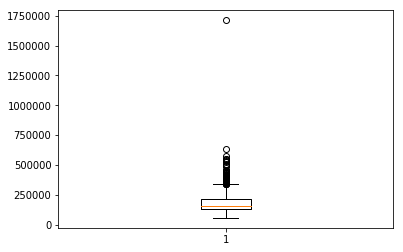

In [359]:
plt.boxplot(results_r2[0])